# Handwritten digit recognition

# ANN

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\home\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Training set size:" , x_train.shape,y_train.shape)
print("testing set size:" , x_test.shape,y_test.shape)

Training set size: (60000, 28, 28) (60000,)
testing set size: (10000, 28, 28) (10000,)


In [4]:
#no of classes

num_labels= len(np.unique(y_train))
num_labels

10

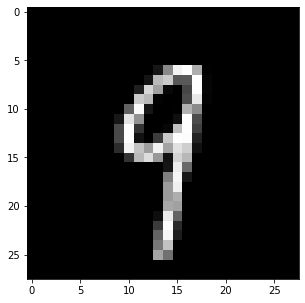

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[900],cmap='gray') #imshow---image show

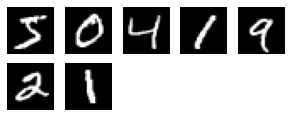

In [6]:
plt.figure(figsize=(5,5))
for i in range(0,7):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')

In [7]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap='gray')
        plt.axis('off')

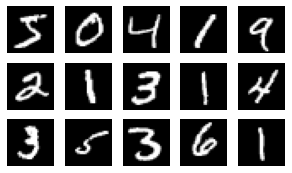

In [8]:
visualize_img(x_train,15)

In [9]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    
    threshold=img.max()/2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                        color='white' if img[x][y]<threshold else "black")

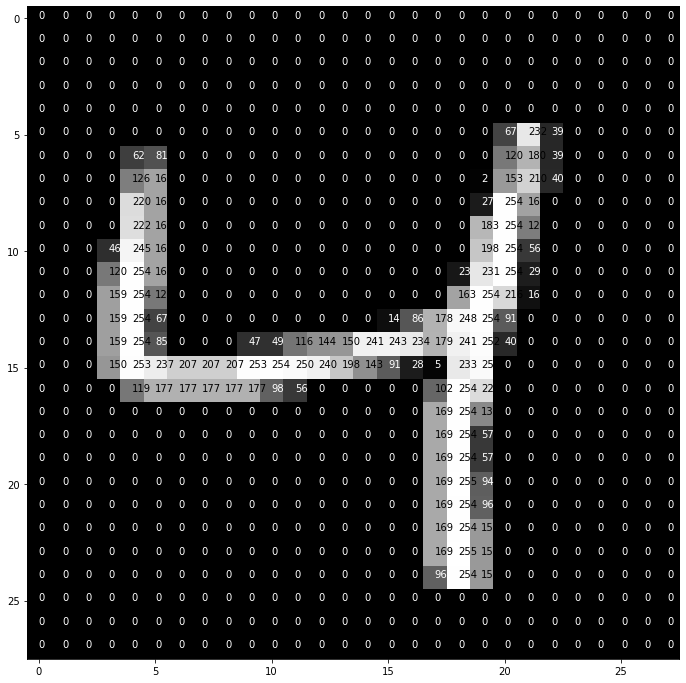

In [10]:
pixel_visualize(x_train[2])

# DATA PREPARATION

In [11]:
#encoding for dependent variable


y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# reshaping

In [14]:
image_size=x_train.shape[1]
image_size

28

In [15]:
print(f"x_train size:{x_train.shape}\n\nx_test size:{x_test.shape}")

x_train size:(60000, 28, 28)

x_test size:(10000, 28, 28)


In [16]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [17]:
print(f"x_train size:{x_train.shape}\n\nx_test size:{x_test.shape}")

x_train size:(60000, 28, 28, 1)

x_test size:(10000, 28, 28, 1)


In [18]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

# Modelling

In [19]:

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)), # making the data understandable
    Dense(units=128, activation="relu",name="layer1"),  # hidden layer
    Dense(units=num_labels, activation="softmax",name="output_layer")])

model.compile(loss="categorical_crossentropy",  # error evaluation metric ,
    optimizer="adam", # optimization algorithm to minimize the loss function
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"ACCURACY"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Model fit

model.fit(x_train,y_train,epochs=8,batch_size=128,
          validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - ACCURACY: 0.8348 - loss: 0.6038 - precision: 0.9357 - recall: 0.7086 - val_ACCURACY: 0.9462 - val_loss: 0.1903 - val_precision: 0.9589 - val_recall: 0.9320
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - ACCURACY: 0.9499 - loss: 0.1806 - precision: 0.9621 - recall: 0.9383 - val_ACCURACY: 0.9593 - val_loss: 0.1409 - val_precision: 0.9685 - val_recall: 0.9513
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9645 - loss: 0.1251 - precision: 0.9724 - recall: 0.9569 - val_ACCURACY: 0.9658 - val_loss: 0.1126 - val_precision: 0.9730 - val_recall: 0.9606
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9729 - loss: 0.0943 - precision: 0.9777 - recall: 0.9679 - val_ACCURACY: 0.9695 - val_loss: 0.0986 - val_precision: 0.9740 - val_recall: 0.9662
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9792 - loss: 0.0729 - precision: 0.9839 - recall: 0.9753 - val_ACCURACY: 0.9733 - val_loss: 0.0881 

In [22]:
history= model.fit(x_train,y_train,epochs=8,batch_size=128, #saving the model
          validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9901 - loss: 0.0365 - precision: 0.9921 - recall: 0.9886 - val_ACCURACY: 0.9776 - val_loss: 0.0694 - val_precision: 0.9801 - val_recall: 0.9755
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9920 - loss: 0.0290 - precision: 0.9934 - recall: 0.9908 - val_ACCURACY: 0.9776 - val_loss: 0.0756 - val_precision: 0.9805 - val_recall: 0.9760
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9942 - loss: 0.0231 - precision: 0.9952 - recall: 0.9930 - val_ACCURACY: 0.9783 - val_loss: 0.0709 - val_precision: 0.9806 - val_recall: 0.9767
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9949 - loss: 0.0216 - precision: 0.9957 - recall: 0.9940 - val_ACCURACY: 0.9777 - val_loss: 0.0713 - val_precision: 0.9794 - val_recall: 0.9764
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ACCURACY: 0.9958 - loss: 0.0191 - precision: 0.9963 - recall: 0.9952 - val_ACCURACY: 0.9795 - val_loss: 0.0709 

In [24]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(f"Test accuracy:{round(acc*100,2)}")
print(f"Test loss:{round(loss*100,2)}")
print(f"Test precision:{round(precision*100,2)}")
print(f"Test recall:{round(recall*100,2)}")



Test accuracy:97.75
Test loss:7.46
Test precision:97.84
Test recall:98.05


# Prediction & visualization

In [25]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [27]:
if len(y_test.shape)> 1 and y_test.shape[1]!= 1:
    y_test=np.argmax(y_test,axis=1)

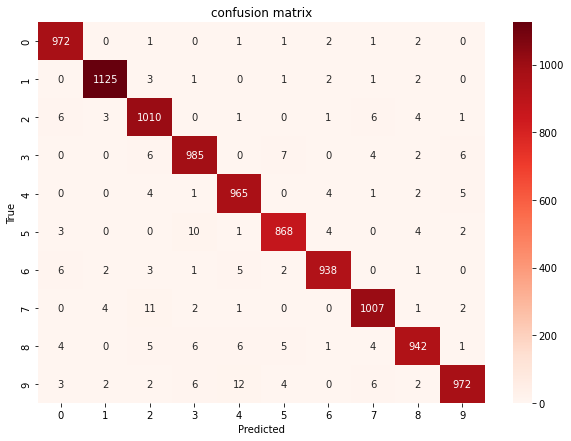

In [35]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion matrix')
plt.show()

# Registering model

In [36]:
model.save("mnist_model.h5")

In [37]:
import random
random=random.randint(0,x_test.shape[0])
random

6876

In [38]:
test_image=x_test[random]

In [39]:
y_test[random]

3

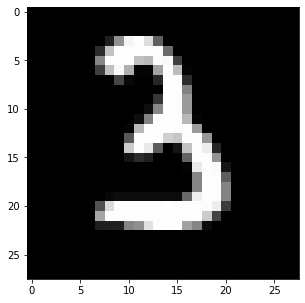

In [43]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [44]:
test_data=x_test[random].reshape(1,28,28,1)


In [45]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [46]:
predicted_classes=np.argmax(probability)

In [48]:
print(f"predicted class:{predicted_classes}\nProbabilty Value of")

predicted class:3
Probabilty Value of
